# TensorFlow: The Estimator API

The Estimators are a high-level TensorFlow API, making your machine learning model making much easier. With the Estimator API you can train, test, and predict datapoints. There are a couple of pre-made estimators such as ```LinearRegressor```. For this workshop we are going to use this high-level API to practice the fundamentals of TensorFlow.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

/Users/noelkonagai/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 1. Create the data

In order to complete this exercise, please create your artificial data in the following way.

In [2]:
x_data = np.linspace(0.0, 10.0, 1000000)
noise = np.random.randn(len(x_data))
b = 5

y_true = (0.5 * x_data ) + b + noise

my_data = pd.concat([pd.DataFrame(data=x_data,columns=['x']),pd.DataFrame(data=y_true,columns=['y'])],axis=1)

## 2. Setting up the tf.estimator API

The ```tf.estimator.LinearRegressor``` takes in feature columns as its argument. For this you need to create a feature column with ```tf.feature_column.numeric_column```. There are other types of columns as well. You can read more through the official API guide [tf.feature_column](https://www.tensorflow.org/api_docs/python/tf/feature_column).

** What is a feature column? ** 

The data used for machine learning typically consists of features and a label. Say, in a dataset of housing listings, the features would be the number of rooms, the floor area, the district it is located in, the year the house was built or renovated, and more. The label would be the price of that apartment. In our case, we only have a simple line y = mx + b. We only have one feature and that is "x". 

The remaining types of feature columns we will see later on. For now, since our feature "x" is continuous, we use ```numeric_column```.

In [3]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/j5/j768nzj554jbgl0ypv8vxk640000gp/T/tmps5be1c4r', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12043cc50>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## 3. Train-Test split of data

Machine learning typically involves splitting the data into three parts. The train data is the dataset on which you train your model. Test data is the data on which you... test your data. But there is a third one, we won't be using it today. It is called evaluate data. It's the last dataset which your model has not ever seen, never been trained on. After you fine-tuned your model, you can typically recombine the train and test data, train your model with it and make a final evaluation with your eval data.

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3, random_state = 101)

## 4. Creating input functions

The training instance of the estimator API takes in an input function that you can call with [tf.estimator.inputs.numpy_input_fn](https://www.tensorflow.org/api_docs/python/tf/estimator/inputs/numpy_input_fn).

For the purposes of this workshop we won't worry about queue capacity and number of threads that could be input in the function below. We will only input the feature column, the label, batch size and the number of epochs.

```python
numpy_input_fn(
    x,
    y=None,
    batch_size=128,
    num_epochs=1,
    shuffle=None,
    queue_capacity=1000,
    num_threads=1
)
```

** What is a batch, an epoch, and how do I choose this values? **

These are concepts that have to do with the input of the data. Let's start with an epoch. One **epoch** is when an entire dataset is passed through the function. In case of neural networks, there is something caled forward and backward propagation. When you pass in the data through the neural network in both directions, it counts as one epoch. Typically, passing in all the data at once is too tolling for our computer's performance so we select smaller portions, in other words **batches**. 

The **batch size** is the total number of training examples present in a batch. The higher the batch size, the more representative of the whole dataset and the more time it takes to train our model. So why is one epoch not enough to train our data? If you trained your model, feeding in batches only once, then you are likely **underfitting** the model to your data. However, if you increase your number of epochs to too large, you're risking **overfitting**. What this means is that you're tailoring the model too much to the data that you are feeding into your model. 

There are some tools that help you fight overfitting. For instance regularization methods, but they are beyond the scope of this workshop. Another is **shuffle**. Shuffle means switching up the order of the data that was fed in. If you turn shuffle off after each epoch, you are likely creating batches that are not representative of the overall dataset, and hence you will get skewed predictions.


In [5]:
train_input_func = tf.estimator.inputs.numpy_input_fn(
    {'x': x_train},
    y_train,
    batch_size=4,
    num_epochs=None,
    shuffle=True)

test_input_func = tf.estimator.inputs.numpy_input_fn(
    {'x': x_eval},
    y_eval,
    batch_size=4,
    num_epochs=1000,
    shuffle=True)

### tf.estimator.LinearRegressor.train

The ```estimator.train``` function takes in an input function that we have defined in the above cell and the number of steps to train the model. 

In [6]:
estimator.train(input_fn = train_input_func, steps = 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/j5/j768nzj554jbgl0ypv8vxk640000gp/T/tmps5be1c4r/model.ckpt.
INFO:tensorflow:loss = 245.67569, step = 1
INFO:tensorflow:global_step/sec: 1319.46
INFO:tensorflow:loss = 16.937115, step = 101 (0.077 sec)
INFO:tensorflow:global_step/sec: 1470.78
INFO:tensorflow:loss = 3.619757, step = 201 (0.068 sec)
INFO:tensorflow:global_step/sec: 1406.76
INFO:tensorflow:loss = 23.242683, step = 301 (0.071 sec)
INFO:tensorflow:global_step/sec: 1362.84
INFO:tensorflow:loss = 8.749347, step = 401 (0.075 sec)
INFO:tensorflow:global_step/sec: 871.126
INFO:tensorflow:loss = 9.290534, step = 501 (0.113 sec)
INFO:tensorflow:global_step/sec: 1347.36
INFO:tensorflow:loss = 6.8463664, step = 601 (0.074 sec)
INFO:tensorflow:global_step/sec: 1335.51
INFO:tensorflow:loss = 1.6947592, step = 701 (0.075 sec)
INFO:tensorflow:global_step/sec: 1286.29
INFO:tensorflow:loss = 2.3520472, step = 801 (0.077 sec)
INFO:tensorfl

In order to see how our model did on the test/eval dataset, we run ```estimator.evaluate```.

In [7]:
test_metrics = estimator.evaluate(input_fn = test_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-03-12-02:39:42
INFO:tensorflow:Restoring parameters from /var/folders/j5/j768nzj554jbgl0ypv8vxk640000gp/T/tmps5be1c4r/model.ckpt-1000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-03-12-02:39:43
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1423452, global_step = 1000, loss = 4.5693808


In [8]:
print("test metrics: {}".format(test_metrics))

test metrics: {'average_loss': 1.1423452, 'loss': 4.5693808, 'global_step': 1000}


We can also create a predict function, where we feed in a new x dataset using ```np.linspace(0,10,10)```.

In [9]:
predict_input_func = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

We make the predictions. If you would like to see them right away, wrap the line below in ```list(<your code>)```.

In [10]:
estimator.predict(input_fn = predict_input_func)

<generator object Estimator.predict at 0x1294b9258>

We read the predictions into an array.

In [11]:
predictions = []# np.array([])
for x in estimator.predict(input_fn = predict_input_func):
    predictions.append(x['predictions'])

INFO:tensorflow:Restoring parameters from /var/folders/j5/j768nzj554jbgl0ypv8vxk640000gp/T/tmps5be1c4r/model.ckpt-1000


In [12]:
predictions

[array([4.3180685], dtype=float32),
 array([4.9883523], dtype=float32),
 array([5.658636], dtype=float32),
 array([6.3289204], dtype=float32),
 array([6.999204], dtype=float32),
 array([7.669488], dtype=float32),
 array([8.339771], dtype=float32),
 array([9.010056], dtype=float32),
 array([9.68034], dtype=float32),
 array([10.350624], dtype=float32)]

And finally plot the predicted line out along with a sample of our original dataset.

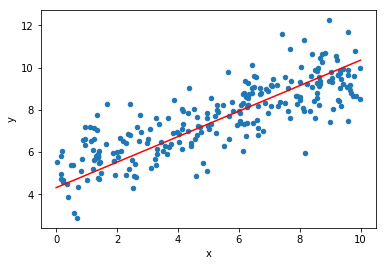

In [13]:
my_data.sample(n=250).plot(kind='scatter',x='x',y='y')
plt.plot(np.linspace(0,10,10), predictions,'r')